In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 8: Random Walk

In [2]:
def walk(total_steps=30):
    position = 0
    position_history = np.arange(0,total_steps,1)

    for i in range(total_steps):
        if np.random.binomial(1,0.6) == 1: # 0.6 is the probability of success
            position += 1
        else:
            position -= 1
        position_history[i] = position

    return(position_history)

In [3]:
def build_plot(total_steps=30):
    x = np.arange(0,total_steps,1)
    y = walk(total_steps)
    plt.xlabel("Current Position")
    plt.ylabel("Total Steps Taken")
    plt.plot(y,x,color="black")
    txt = "Trajectory of a wandom walk of 30 steps, where " + \
            "the current position is the number of steps " +\
            "to the right (if positive) or to the left (if negative)"
    plt.figtext(0.5, -0.04, txt,
                wrap=True,
                horizontalalignment='center',
                fontsize=12)
    plt.show()

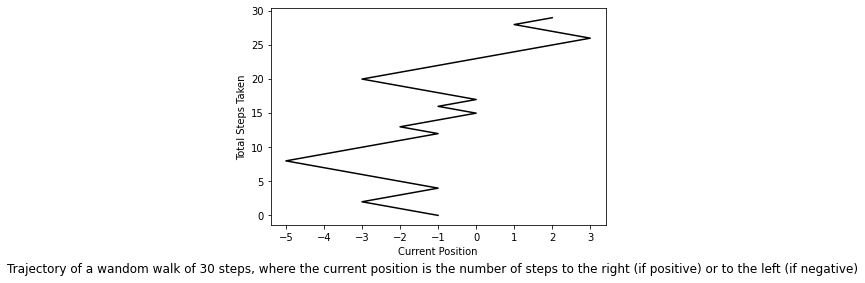

In [4]:
build_plot()

In [5]:
def get_stats(sample_size=200):

    sample_weights = np.full((1,sample_size),(1/sample_size))

    final_positions = np.array([walk()[-1] for _ in range(sample_size)])
    sample_mean = (sample_weights @ final_positions.transpose())[0]

    mean_diff = np.vectorize(lambda x: (sample_mean-x)**2)(final_positions)
    variance = (sample_weights @ mean_diff.transpose() ) / (sample_size-1)
    
    return final_positions, sample_mean, (variance)[0]

In [6]:
sample_size = 200
final_positions, sample_mean, variance = get_stats(sample_size)

### Histogram

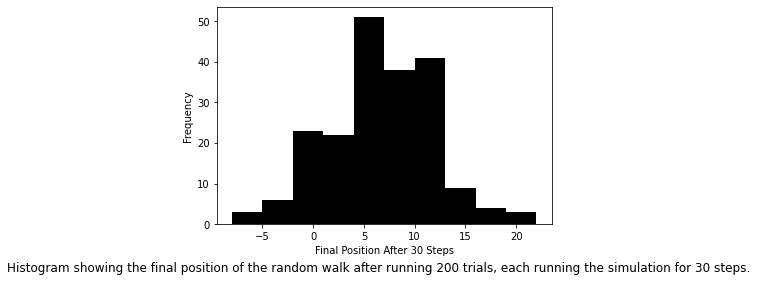

In [7]:
plt.hist(final_positions, color="black")
plt.xlabel("Final Position After 30 Steps")
plt.ylabel("Frequency")
txt =   "Histogram showing the final position of the random walk after " +\
        "running 200 trials, each running the simulation for 30 steps."
plt.figtext(0.5, -0.04, txt,
                wrap=True,
                horizontalalignment='center',
                fontsize=12)
plt.show()

### Sample Stats

In [8]:
print(f"The sample mean for the final position after " +\
        f"{sample_size} trials is {sample_mean}, while its " +\
        f"variance is {variance}")

The sample mean for the final position after 200 trials is 6.1899999999999995, while its variance is 0.13278341708542712


The actual values should be 0.6 and 0, respectively. Given with 30 steps, if 60% are to the right and 40% are to the left (30*0.6-30*0.4 would give you 6).

## Exercise 8: Random Walk

In [9]:
def play(game_length=2100, initial_fortune=100):
    history = np.zeros(game_length+1)
    history[0] = initial_fortune
    for i in range(game_length):
        if history[i] == 0:
            break
        history[i+1] = history[i]+np.random.choice([1,-1])
    return i+1, history[i+1]

In [14]:
def run_gambler_ruin(sample_size=1000, **kwargs):
    duration_means = np.zeros(sample_size)
    final_pay_means = np.zeros(sample_size)
    for i in range(sample_size):
        game_duration, final_pay = play(kwargs["game_length"],kwargs["initial_fortune"])
        duration_means[i] = game_duration
        final_pay_means[i] = final_pay

    duration = {
        "mean":np.mean(duration_means),
        "var":np.var(duration_means)
    }
    final_pay = {
        "mean":np.mean(final_pay_means),
        "var":np.var(final_pay_means)
    }

    return duration, final_pay

In [15]:
run_gambler_ruin(1000,game_length=2100, initial_fortune=100)

# means: 2091 (duration), 100.684 (final_payoff)
# variances: 6710 (duration), 1873 (final_payoff)

({'mean': 2090.787, 'var': 6710.403631}, {'mean': 100.684, 'var': 1872.852144})

In [16]:
run_gambler_ruin(1000,game_length=1400, initial_fortune=100)

# means: 1399 (duration), 99.2 (final_payoff)
# variances: 193 (duration), 1420 (final_payoff)

({'mean': 1399.208, 'var': 193.56873599999992},
 {'mean': 99.206, 'var': 1420.725564})

In [17]:
run_gambler_ruin(1000,game_length=400, initial_fortune=100)

# means: 400 (duration), 99.9 (final_payoff)
# variances: 0 (duration), 407 (final_payoff)

({'mean': 400.0, 'var': 0.0}, {'mean': 99.858, 'var': 407.45583600000003})

In [18]:
run_gambler_ruin(1000,game_length=50, initial_fortune=100)

# means: 50 (duration), 100.036 (final_payoff)
# variances: 0 (duration), 50 (final_payoff)

({'mean': 50.0, 'var': 0.0}, {'mean': 100.036, 'var': 50.75870400000001})

resulted in 2088 as the duration mean
and 100.5 as the final payoff